In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday/train.csv
/kaggle/input/black-friday/test.csv


In [3]:
df_train=pd.read_csv('/kaggle/input/black-friday/train.csv')
df_train.shape

(550068, 12)

In [4]:
df_test=pd.read_csv('/kaggle/input/black-friday/test.csv')
df_test.shape

(233599, 11)

In [5]:
final = pd.concat([df_train, df_test], ignore_index=True)

In [6]:
final.shape

(783667, 12)

In [7]:
final.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
304900,1004957,P00218242,M,26-35,2,A,1,1,5,8.0,NaN,5188.0
233685,1006036,P00314142,F,26-35,15,B,4+,1,8,16.0,NaN,5959.0
171041,1002406,P00177942,F,55+,12,C,1,1,5,8.0,NaN,8606.0
386239,1005449,P00046742,M,18-25,12,C,1,0,1,2.0,15.0,19634.0
271611,1005851,P00329442,F,18-25,20,A,0,1,5,8.0,NaN,8709.0


In [8]:
final.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [9]:
final.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
# final=final.iloc[:,1:]
final.drop(['User_ID'],axis=1,inplace=True)

In [11]:
final

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [12]:
# final=pd.get_dummies(final,columns=['Gender'],drop_first=True)

In [13]:
final['Gender']=final['Gender'].map({'F':0,'M':1})

In [14]:
final

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,0,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,0,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,0,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [15]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()

# final['Age']=le.fit_transform(final['Age'])

# final.sample(10)

In [16]:
final['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [17]:
final['Age']=final['Age'].map({'0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})
final.sample(10)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
719270,P00121042,0,4,0,A,2,0,15,NaN,NaN,NaN
700616,P00339342,1,4,12,C,0,1,1,NaN,NaN,NaN
185700,P00070442,1,2,4,B,2,0,1,15.0,NaN,15440.0
118093,P00265242,1,5,17,C,1,1,5,8.0,NaN,5417.0
94700,P00025442,1,3,14,B,2,0,1,2.0,9.0,19566.0
510418,P00101242,1,4,18,C,2,1,5,12.0,NaN,7165.0
228273,P00182842,0,4,11,B,1,0,5,NaN,NaN,3609.0
5899,P00365242,1,4,1,C,2,1,5,8.0,NaN,8761.0
49835,P00359242,1,3,0,B,1,0,1,5.0,17.0,15390.0
291200,P00198242,0,4,5,A,4+,0,2,4.0,9.0,3806.0


In [18]:
final_city=pd.get_dummies(final['City_Category'],drop_first=True)

In [19]:
final=pd.concat([final,final_city],axis=1)
final.drop('City_Category',inplace=True,axis=1)

In [20]:
final

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,True,False
783663,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,True,False
783664,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,True,False
783665,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,False,True


In [21]:
final.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [22]:
final['Product_Category_2'].mode()[0]

8.0

In [23]:
final['Product_Category_2']=final['Product_Category_2'].fillna(final['Product_Category_2'].mode()[0])
final['Product_Category_2'].isna().sum()

0

In [24]:
final['Product_Category_3']=final['Product_Category_3'].fillna(final['Product_Category_3'].mode()[0])
final['Product_Category_3'].isna().sum()

0

In [25]:
final['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [26]:
final['Stay_In_Current_City_Years']=final['Stay_In_Current_City_Years'].str.replace('+','')
final['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [27]:
final['Stay_In_Current_City_Years']=final['Stay_In_Current_City_Years'].astype(int)
final['B']=final['B'].astype(int)
final['C']=final['C'].astype(int)

final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


In [28]:
import seaborn as sns

In [ ]:
# sns.pairplot(final)

In [30]:
final.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Purchase'>

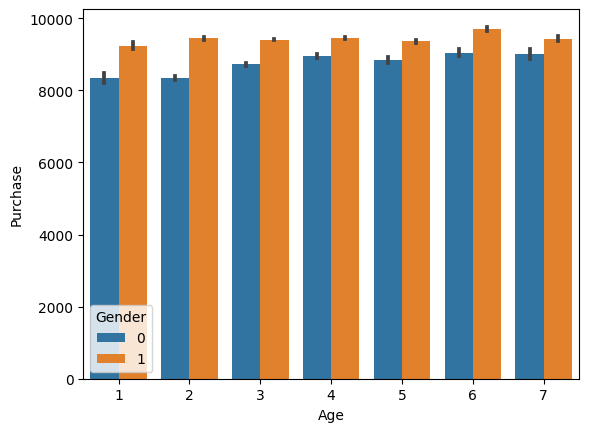

In [31]:
# Visualization of Purchase with Gender
sns.barplot(x='Age',y='Purchase',hue='Gender',data=final)

In [36]:
fina_res=final.groupby("Occupation")['Purchase'].sum()
fina_res

Occupation
0     635406958.0
1     424614144.0
2     238028583.0
3     162002168.0
4     666244484.0
5     113649759.0
6     188416784.0
7     557371587.0
8      14737388.0
9      54340046.0
10    115844465.0
11    106751618.0
12    305449446.0
13     71919481.0
14    259454692.0
15    118960211.0
16    238346955.0
17    393281453.0
18     60721461.0
19     73700617.0
20    296570442.0
Name: Purchase, dtype: float64

In [37]:
top_three_occupations = fina_res.sort_values(ascending=False).head(3)


In [38]:
top_three_occupations_names = top_three_occupations.index
top_three_occupations_values = top_three_occupations.values


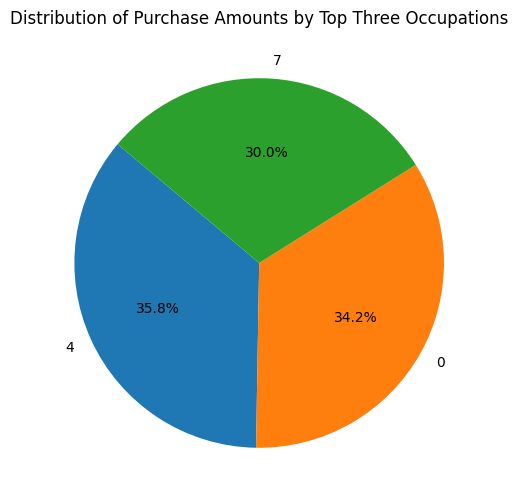

In [39]:
import matplotlib.pyplot as plt

# Assuming you have already calculated top_three_occupations_names and top_three_occupations_values

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_three_occupations_values, labels=top_three_occupations_names, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Purchase Amounts by Top Three Occupations')

# Display the pie chart
plt.show()
